# Short Time FFT

In [9]:
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
import librosa
import simpleaudio
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# data, fs = librosa.load('soudns/voicemail-12893193856.m4a')
data, fs = librosa.load('soudns/gmajor-scale-2octave-up-down-up-down.wav')
N = 1600
st = ShortTimeFFT(win=gaussian(N, N/2), hop=60, fs=fs, scale_to='magnitude')
z = st.stft(data)
c = np.abs(z)
ll = np.quantile(np.log(c).ravel(), .01)  # lower limit
plot_data = np.where(np.log(c) < ll, ll, np.log(c))

In [11]:
tslices = st.t(len(data))
i1 = np.where(tslices==0)[0][0]
i2 = np.where((tslices - len(data) / fs) ** 2 == np.min((tslices - len(data)/fs) ** 2))[0][0]
plotx = i1 + (i2 - i1) * (np.arange(len(data)) / len(data))
a1, b1 = c.shape
s = data.std()
data2 = (-data * a1  / s / 20) + (a1 / 2)

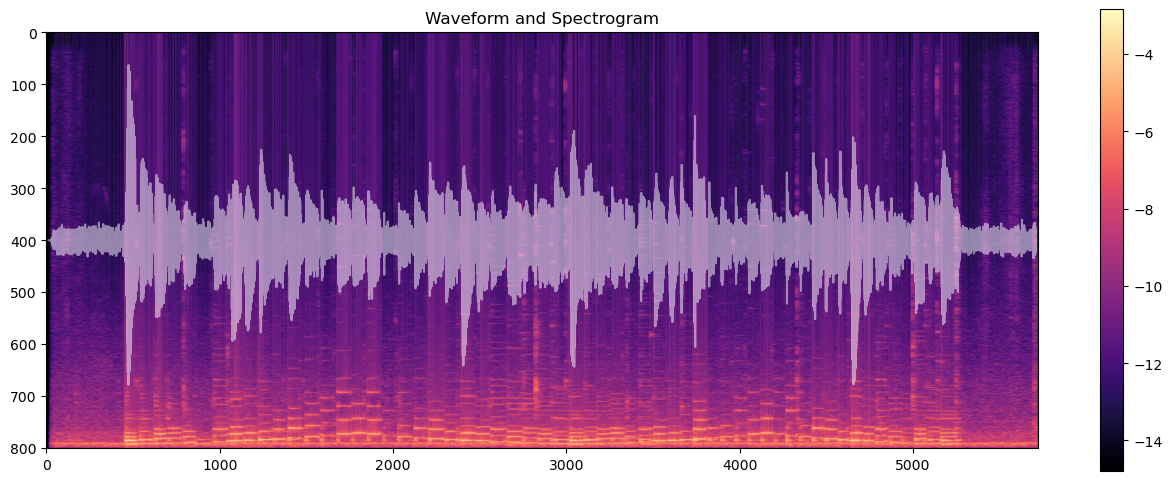

In [12]:
f, ax = plt.subplots(1, 1, figsize=(16,6))
hm = ax.imshow(np.flip(plot_data, axis=0), cmap='magma', aspect=3)
ax.plot(plotx, data2, 'w-', alpha=.5)
ax.set_title('Waveform and Spectrogram')
plt.colorbar(mappable=hm)
plt.show()